# Project Iris
A demonstration of a Machine Learning [Multilayer Perceptron](https://scikit-learn.org/stable/modules/neural_networks_supervised.html) to do Multiclass Classification to predict the type of iris from a flower's attributes.

## Importing Libraries and Data
The [Iris Data Set](http://archive.ics.uci.edu/ml/datasets/Iris) contains attribute information for 150 irises.  The attributes are: sepal length, sepal width, petal length, petal width, and class (Iris Setosa, Iris vericolour, or Iris Virginica).  The measurements are all in cemtimeters.

### Importing Libraries

In [1]:
# We import pandas for dataframes
import pandas as pd

# Import NumPy for math functions and calculations
import numpy as np

# Import from sklearn library for machine learning
from sklearn.model_selection import train_test_split   # for splitting the dataset
from sklearn.neural_network import MLPClassifier       # the main model library
from sklearn.metrics import accuracy_score             # to calculate error
from sklearn.preprocessing import StandardScaler       # to normalize/feature-scale data

# Import plotting library to display data
from matplotlib import pyplot as plt

### Importing Data

In [2]:
# Read in dataset
iris_data = pd.read_csv("../_data/iris.data", header=None)

## Exploring the Data

In [3]:
### Print Sample Rows

In [4]:
# Print a selection from the data frame
print(iris_data.head())

     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa


### Change Column Names

In [5]:
# Add meaningful column names
iris_data.rename(columns = {0:"Sepal Length", 1:'Sepal Width', 2:'Petal Length', 
                            3:'Petal Width', 4:'Iris Type'},inplace=True)
print(iris_data.head())

   Sepal Length  Sepal Width  Petal Length  Petal Width    Iris Type
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


### Find all Iris Types

In [6]:
# Before converting column iristype to 'iris num', we check the set of column values.
print(iris_data['Iris Type'].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


### Display the Data

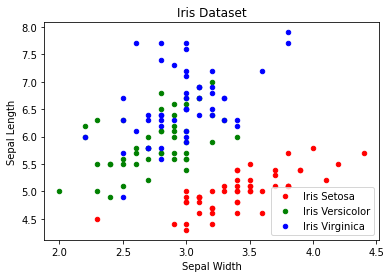

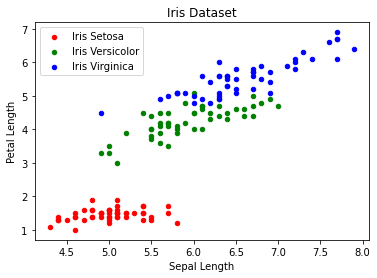

In [7]:
# Split the data into multiple data frames based on the type of iris
setosas = iris_data[iris_data['Iris Type'] == 'Iris-setosa']
versicolors = iris_data[iris_data['Iris Type'] == 'Iris-versicolor']
virginicas = iris_data[iris_data['Iris Type'] == 'Iris-virginica']

# Function to plot iris_data using only two features (columns) and three colors
def plot_2d(x_str, y_str):
    ax = setosas.plot(x=x_str, y=y_str, kind='scatter',c='r',label='Iris Setosa')
    versicolors.plot(x=x_str, y=y_str, kind='scatter', ax=ax, c='g', label='Iris Versicolor')
    virginicas.plot(x=x_str, y=y_str,kind='scatter', ax=ax, c='b', label='Iris Virginica')
    plt.title("Iris Dataset")
    plt.show()
    # plt.savefig("iris_data_scatterplot.png")

# Plot two features against each other in scatter plots
plot_2d('Sepal Width', 'Sepal Length')
plot_2d('Sepal Length', 'Petal Length')

### Check Data Statistics
Rough way to compare the distributions in each column.

In [8]:
feature_columns = ["Sepal Length", 'Sepal Width', 'Petal Length', 'Petal Width']
print("Maximums: ")
iris_data[feature_columns].min()

Maximums: 


Sepal Length    4.3
Sepal Width     2.0
Petal Length    1.0
Petal Width     0.1
dtype: float64

In [9]:
print("Minimums: ")
iris_data[feature_columns].min()

Minimums: 


Sepal Length    4.3
Sepal Width     2.0
Petal Length    1.0
Petal Width     0.1
dtype: float64

In [10]:
print("Means: ")
iris_data[feature_columns].mean()

Means: 


Sepal Length    5.843333
Sepal Width     3.054000
Petal Length    3.758667
Petal Width     1.198667
dtype: float64

## Wrangle the Data
Edit the data to prepare for developing the maching learning model

### Correct Data Errors
The Iris dataset has [errors in two lines](http://archive.ics.uci.edu/ml/datasets/Iris).  "The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" where the error is in the fourth feature. The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa" where the errors are in the second and third features."
We fix those errors below.  Since the numbering in Python starts at 0, we change the 34th and 37th lines of the data.

In [11]:
# Correcting the two errors in the data
iris_data.loc[34,'Petal Width'] = 0.2
iris_data.loc[37, 'Sepal Width'] = 3.6
iris_data.loc[37, 'Petal Length'] = 1.4
print(iris_data.loc[34:38,:])

    Sepal Length  Sepal Width  Petal Length  Petal Width    Iris Type
34           4.9          3.1           1.5          0.2  Iris-setosa
35           5.0          3.2           1.2          0.2  Iris-setosa
36           5.5          3.5           1.3          0.2  Iris-setosa
37           4.9          3.6           1.4          0.1  Iris-setosa
38           4.4          3.0           1.3          0.2  Iris-setosa



### Replace Categorical Label
We create a new feature: "Iris Num" that is a numerical replacement for the categorical variable "Iris Type",

In [12]:

# Add a new column to iris_data called "Iris Num" that represents "Iris Type" as a number
iris_type_dict = {'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3}
iris_data['Iris Num'] = iris_data['Iris Type'].map(iris_type_dict)
print(iris_data)

     Sepal Length  Sepal Width  Petal Length  Petal Width       Iris Type  \
0             5.1          3.5           1.4          0.2     Iris-setosa   
1             4.9          3.0           1.4          0.2     Iris-setosa   
2             4.7          3.2           1.3          0.2     Iris-setosa   
3             4.6          3.1           1.5          0.2     Iris-setosa   
4             5.0          3.6           1.4          0.2     Iris-setosa   
..            ...          ...           ...          ...             ...   
145           6.7          3.0           5.2          2.3  Iris-virginica   
146           6.3          2.5           5.0          1.9  Iris-virginica   
147           6.5          3.0           5.2          2.0  Iris-virginica   
148           6.2          3.4           5.4          2.3  Iris-virginica   
149           5.9          3.0           5.1          1.8  Iris-virginica   

     Iris Num  
0           1  
1           1  
2           1  
3          

### Divide into variables and labels
We want the data in the form of a matrix X (the first four numberic columns of the data) 
and y (the iris num column).

In [13]:
y = pd.DataFrame(iris_data, columns=['Iris Num'])
X = pd.DataFrame(iris_data, columns=feature_columns)

### Divide data into train and test sets
We divide the data into training (80%) and test (20%) sets.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Define the Model
We use a multi-class classifier [MLPClasifier](https://scikit-learn.org/stable/modules/neural_networks_supervised.html) with 2 hidden layers, each with 7 nodes each.

In [15]:
# Initialize classifier
clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(7, 2), random_state=100)

# Train the classifier
clf.fit(X_train, y_train.values.ravel())

MLPClassifier(hidden_layer_sizes=(7, 2), random_state=100, solver='lbfgs')

## Evaluate Model

In [16]:
# Make predictions
y_predicted = clf.predict(X_test)

In [17]:
# Evaluate accuracy
print("{0:.0%}".format(accuracy_score(y_test, y_predicted)))

100%


# Conclusion
The choice of architechture (2 hidden layers with 7 nodes in each layer) was arbitrary.  While the accuracy is high on this small set, the model could be improved if you had more data to test on.  One way to improve the model is to create a series of models with different learning rates and hidden layer sizes.  Train each model on the test set, then decide between the models using a validation set.